In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from ast import literal_eval
from sklearn.metrics import cohen_kappa_score

In [2]:
df = pd.read_csv('data/instances_2014all_workerinfo.csv')

## Do Aggregated Labels Represent Individuals Uniformly?

In [136]:
def to_int(label):
    if label == 'Male': return 0
    elif label == 'Female': return 1
    elif label == 'Unsure': return 2
    else:
        raise ValueError
        
def worker_annotations(att):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                wtoa[worker]['i'].append(to_int(anns[index]))
                wtoa[worker]['maj'].append(to_int(maj))
    return wtoa

def get_irr(wtoa):
    # evaluate cohen's kappa
    ck = []
    for worker in wtoa:
        individual = wtoa[worker]['i']
        majority = wtoa[worker]['maj']
        score = cohen_kappa_score(individual, majority)
        if score != score:
            ck.append(1.0)
        else:
            ck.append(score)
    return ck

/scratch/network/dorothyz/miniconda3/envs/sony/lib/python3.7/site-packages/sklearn/metrics/_classification.py:641: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/scratch/network/dorothyz/miniconda3/envs/sony/lib/python3.7/site-packages/sklearn/metrics/_classification.py:641: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/scratch/network/dorothyz/miniconda3/envs/sony/lib/python3.7/site-packages/sklearn/metrics/_classification.py:641: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/scratch/network/dorothyz/miniconda3/envs/sony/lib/python3.7/site-packages/sklearn/metrics/_classification.py:641: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/scratch/network/dorothyz/miniconda3/envs/sony/lib/python3.7/site-packages/s

Text(0.5, 1.0, 'Gender')

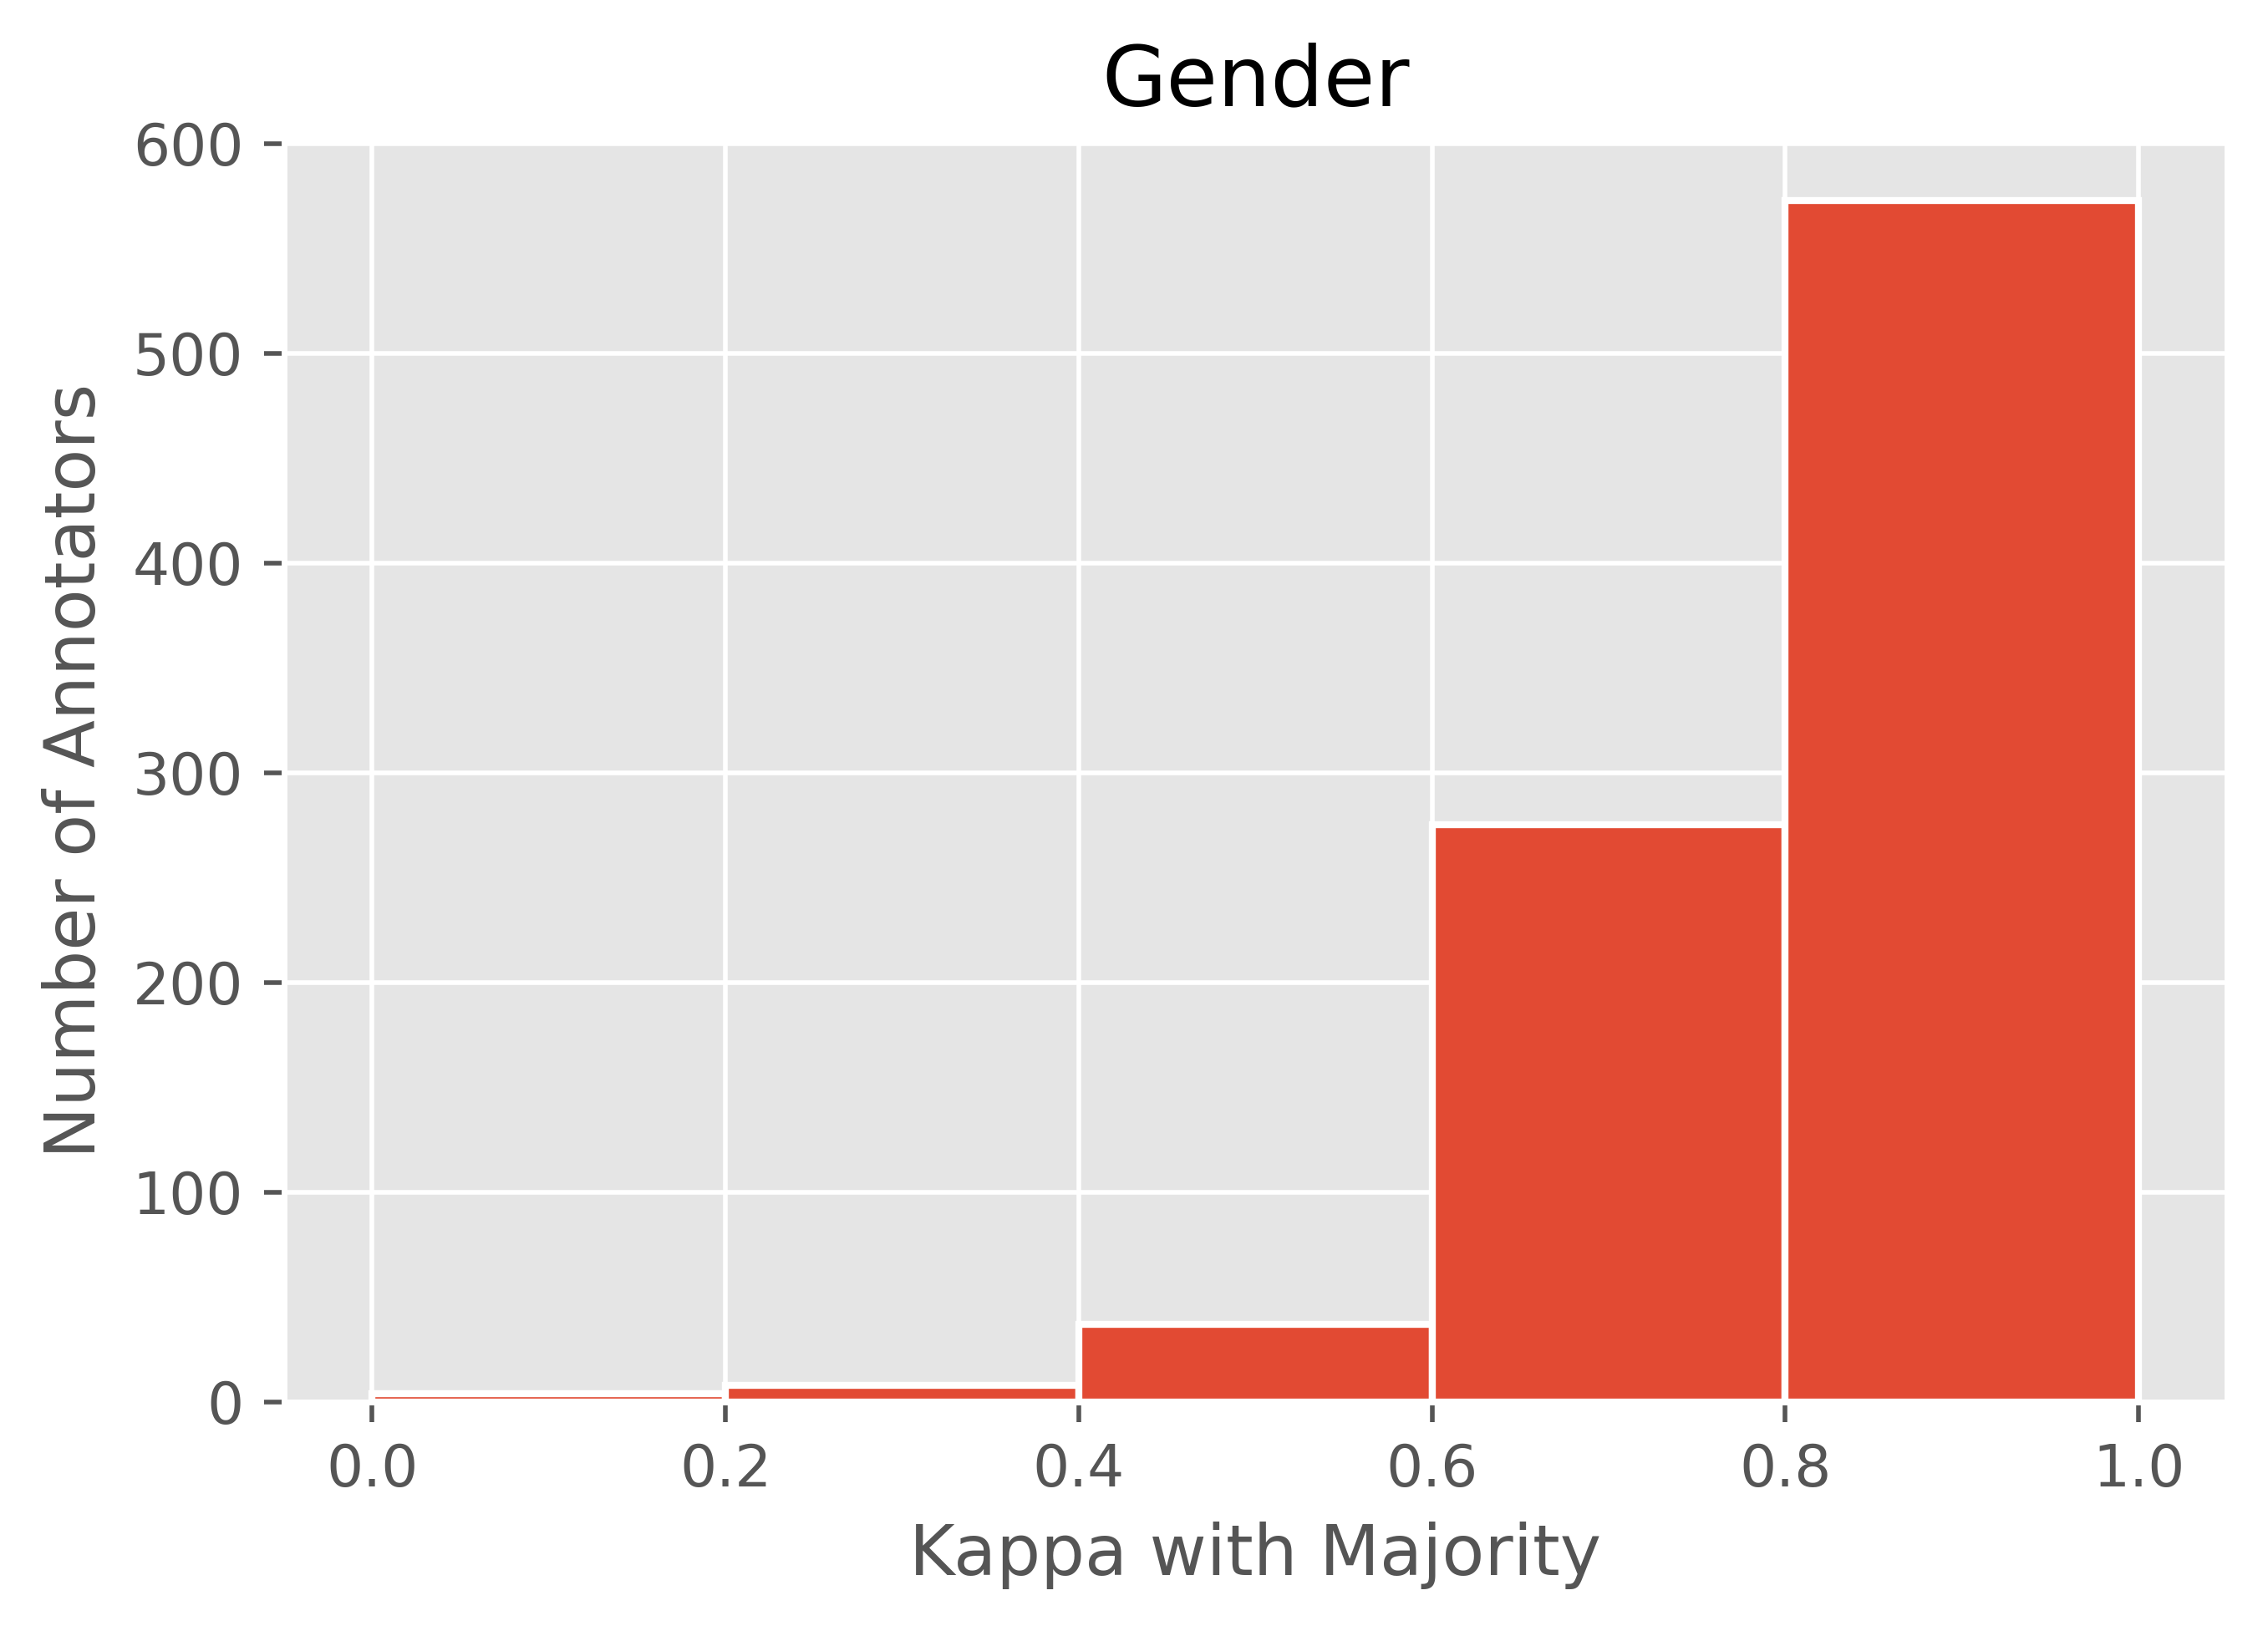

In [137]:
plt.style.use('ggplot')
plt.figure(dpi=500)
plt.hist(get_irr(worker_annotations('gender')), bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], edgecolor='white', linewidth=1.2)
plt.ylabel('Number of Annotators')
plt.xlabel('Kappa with Majority')
plt.title('Gender')

Text(0.5, 1.0, 'Skin Color')

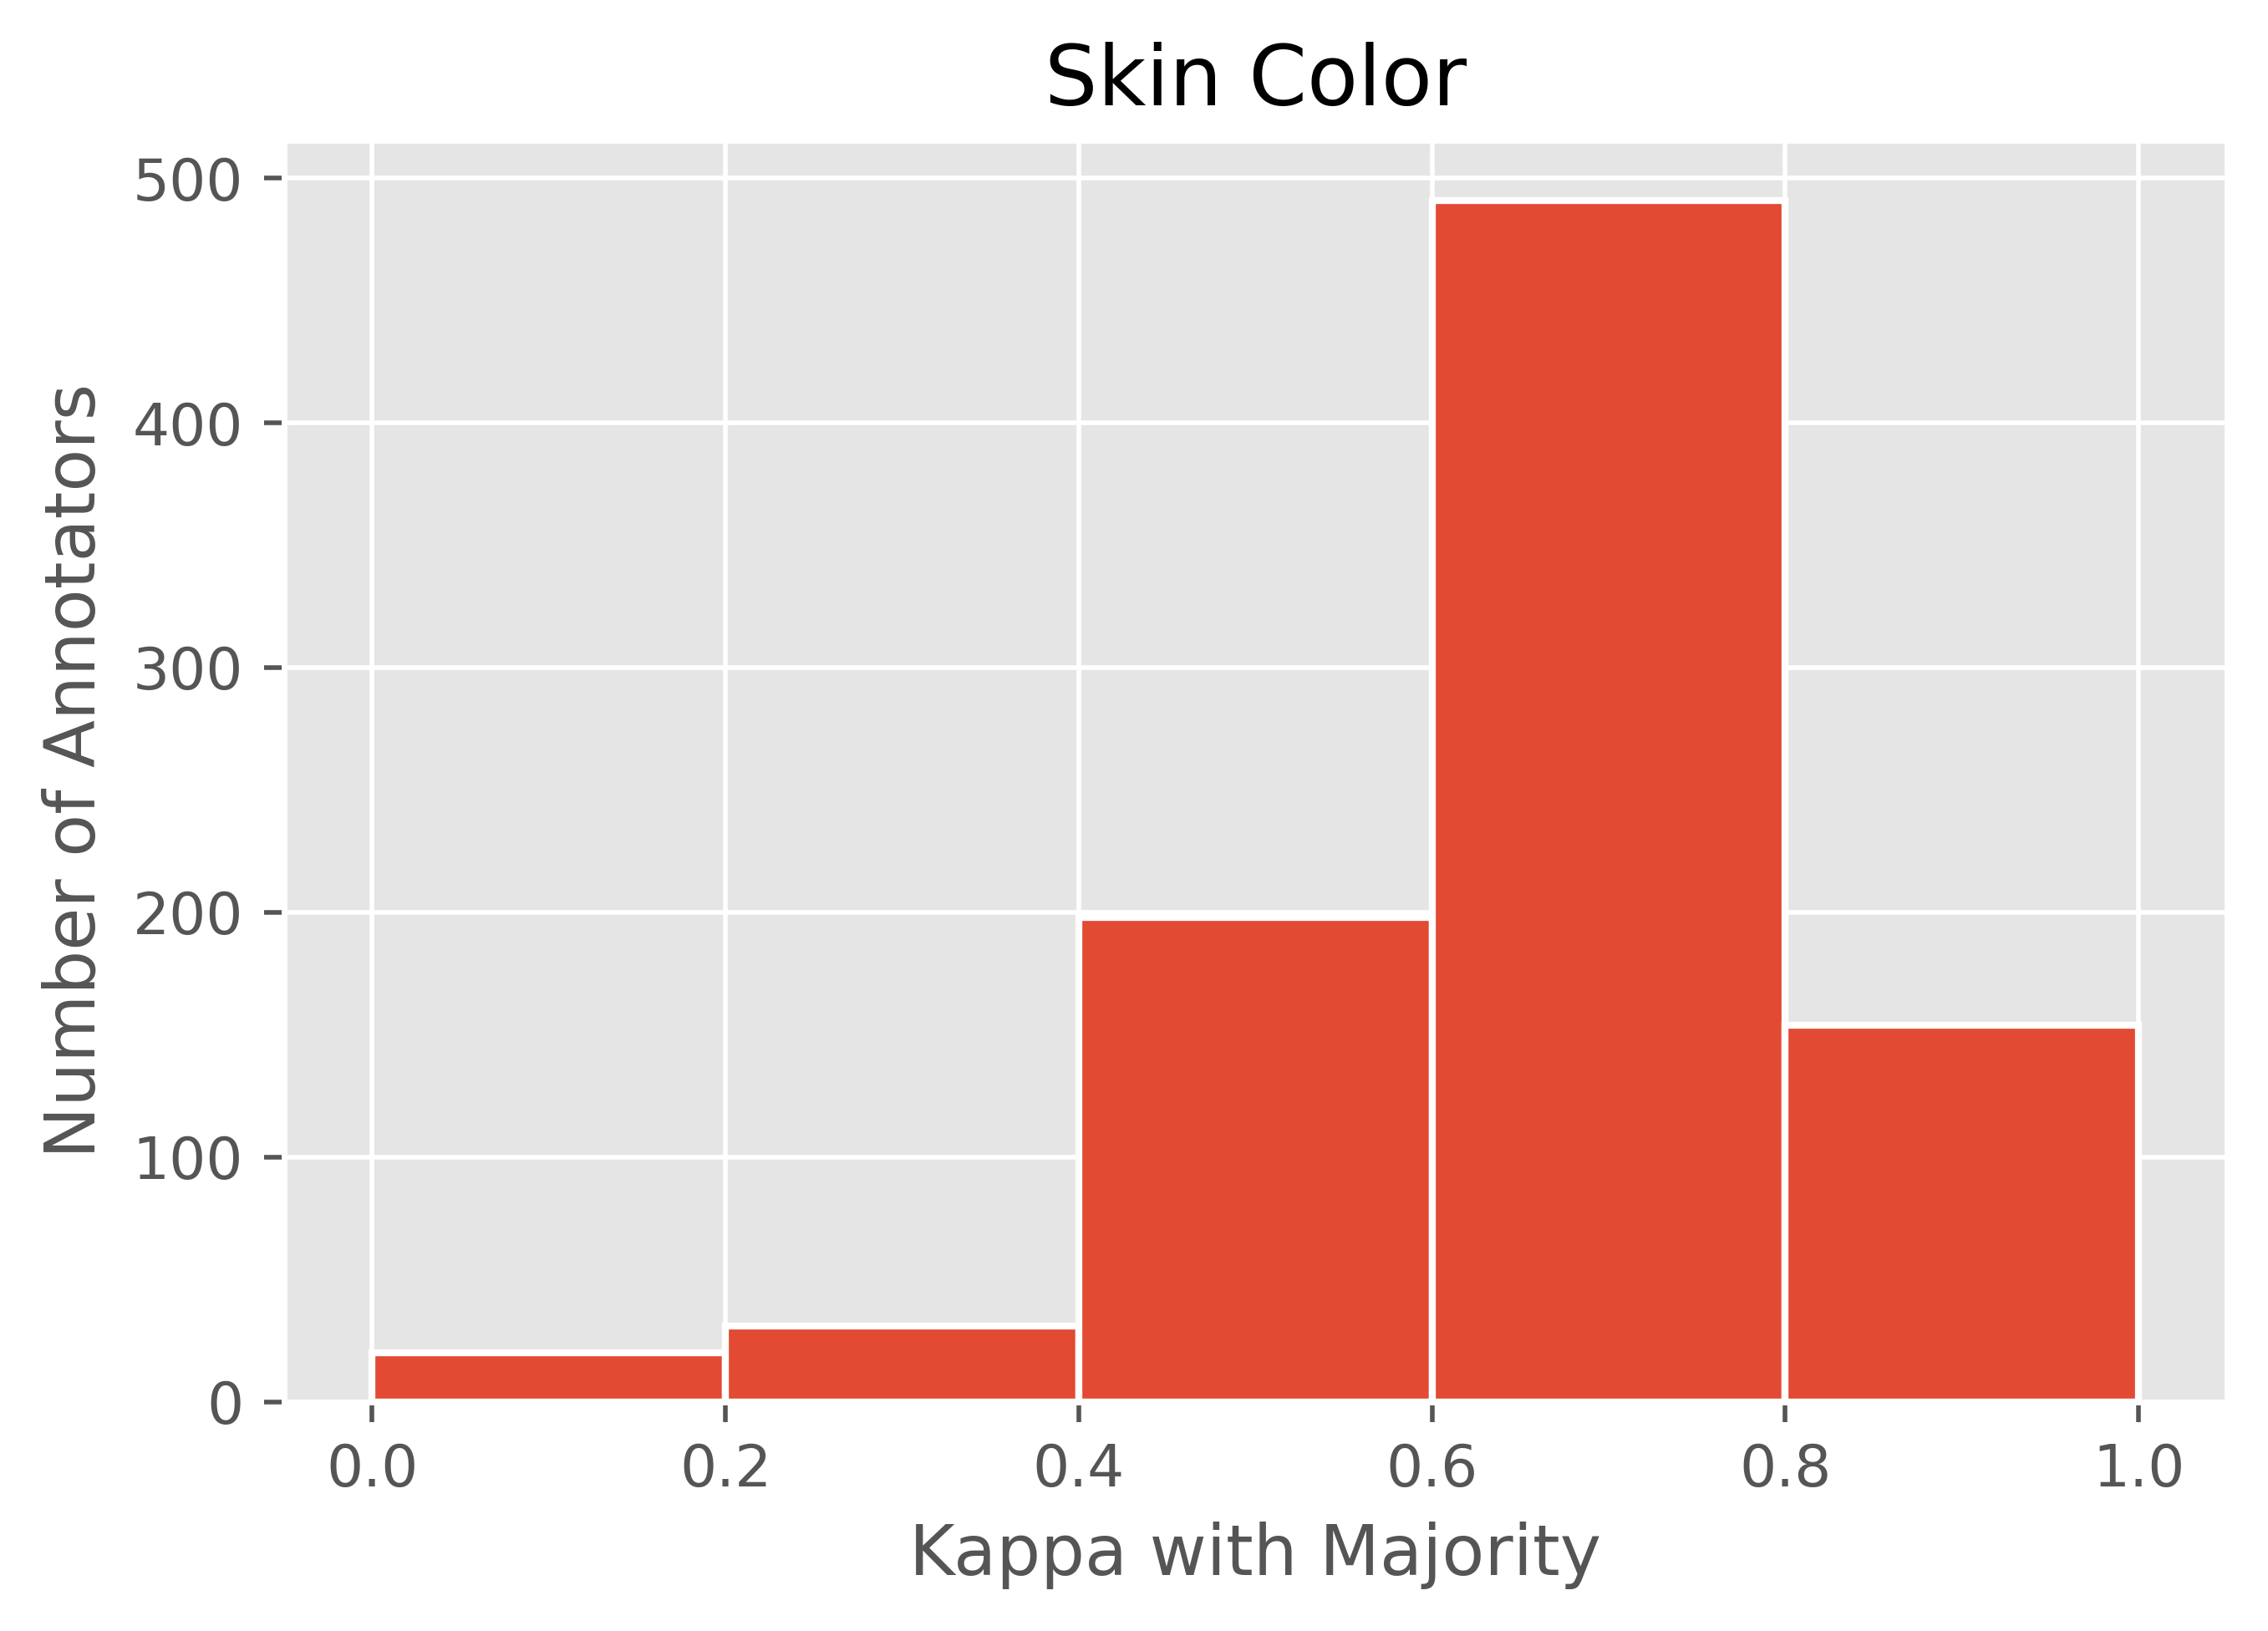

In [138]:
wtoa = {}
for row in df.iterrows():
    worker_ids = literal_eval(row[1]['worker_id'])
    skin_anns = literal_eval(row[1]['skin_agg'])
    maj = row[1]['skin']
    if maj != maj:
        continue
    else:
        for index, worker in enumerate(worker_ids):
            if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
            if skin_anns[index] == 'Unsure': skin_anns[index] = 7
            if maj == 'Unsure': maj = 7
            wtoa[worker]['i'].append(int(skin_anns[index]))
            wtoa[worker]['maj'].append(int(maj))

# evaluate cohen's kappa
ck = []
for worker in wtoa:
    individual = wtoa[worker]['i']
    majority = wtoa[worker]['maj']
    score = cohen_kappa_score(individual, majority)
    if score != score:
        ck.append(1.0)
    else:
        ck.append(score)

plt.style.use('ggplot')
plt.figure(dpi=500)
plt.hist(ck, bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], edgecolor='white', linewidth=1.2)
plt.ylabel('Number of Annotators')
plt.xlabel('Kappa with Majority')
plt.title('Skin Color')

## Do Aggregated Labels Represent Demographic Groups?

In [129]:
worker_demographics = pickle.load(open('data/worker_demographics.pkl', 'rb'))
worker_demographics

{'A1OJ8IJAEIWL9T': {'gender': 'male', 'race': ['white']},
 'A346OU8MU3KYDW': {'gender': 'female', 'race': ['white']},
 'A3Q9H7A8J8GR01': {'gender': 'female', 'race': ['asian']},
 'A38GSW5JQW6NVB': {'gender': 'male', 'race': ['white']},
 'A2DP3VTWJJ5P0W': {'gender': 'female', 'race': ['white']},
 'A2RAWOA1WXZUJU': {'gender': 'female', 'race': ['white', 'asian']},
 'A39J8MSTUDVH0D': {'gender': 'female', 'race': ['white']},
 'A3OJGWW5NPC8E5': {'gender': 'female', 'race': ['white']},
 'A2YBRWIUM45CAJ': {'gender': 'female', 'race': ['white']},
 'A3BTV0RLP0LTO8': {'gender': 'female', 'race': ['asian']},
 'A2Z5C5P2099MWT': {'gender': 'female', 'race': ['white']},
 'A3K1P4SPR8XS7R': {'gender': 'female', 'race': ['asian']},
 'A3JYTT5ZHFKR7A': {'gender': 'male', 'race': ['white']},
 'ADQHGQF65JJ08': {'gender': 'female', 'race': ['asian']},
 'A2MPRJVMM87Q7O': {'gender': 'female', 'race': ['white']},
 'A1GD826IBLBXB3': {'gender': 'male', 'race': ['white']},
 'ASKUEWVYYCZWO': {'gender': 'female', '

In [128]:
def worker_gender(att, gender):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker in worker_demographics and worker_demographics[worker]['gender'] == gender: 
                    if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                    wtoa[worker]['i'].append(to_int(anns[index]))
                    wtoa[worker]['maj'].append(to_int(maj))
    return wtoa

def worker_race(att, race):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker in worker_demographics and worker_demographics[worker]['race'] == [race]: 
                    if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                    wtoa[worker]['i'].append(to_int(anns[index]))
                    wtoa[worker]['maj'].append(to_int(maj))
    return wtoa

In [127]:
male_gender = get_irr(worker_gender('gender', 'male'))
female_gender = get_irr(worker_gender('gender', 'female'))

print(np.mean(male_gender))
print(np.mean(female_gender))

0.8150005826604781
0.8155399936824786


In [134]:
white_gender = get_irr(worker_race('gender', 'white'))
black_gender = get_irr(worker_race('gender', 'black'))
asian_gender = get_irr(worker_race('gender', 'asian'))
lat_gender = get_irr(worker_race('gender', 'latinx'))


print(np.mean(white_gender))
print(np.mean(black_gender))
print(np.mean(asian_gender))
print(np.mean(lat_gender))

0.8150354696560811
0.8070261204976776
0.8178932716600452
0.8130069696621246
